In [1]:
#|default_exp app

In [2]:
#|export
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

In [3]:
#|export
data = pd.read_csv('Lowa_Liquor_Sales_2016_2019.csv')

most_popular = pd.DataFrame(data
                            .groupby(by=['zip_code','item_description'])
                            .sum()['bottles_sold']).reset_index()

most_popular.sort_values(by=['zip_code', 'bottles_sold'],  
                         ascending = [True, False])

sales_per_store = pd.DataFrame(data
                               .groupby(by=['store_number','store_name'])
                               .sum()['sale_dollars']).reset_index()

sales_per_store['sale_dollars_percentage'] = sales_per_store['sale_dollars']\
    .apply(lambda x: (x/data['sale_dollars'].sum())*100)

sales_per_store['store_number'] = sales_per_store['store_number'].astype(str)

2022-11-16 20:49:08.124 
  command:

    streamlit run /home/dragon/miniconda3/envs/fast/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

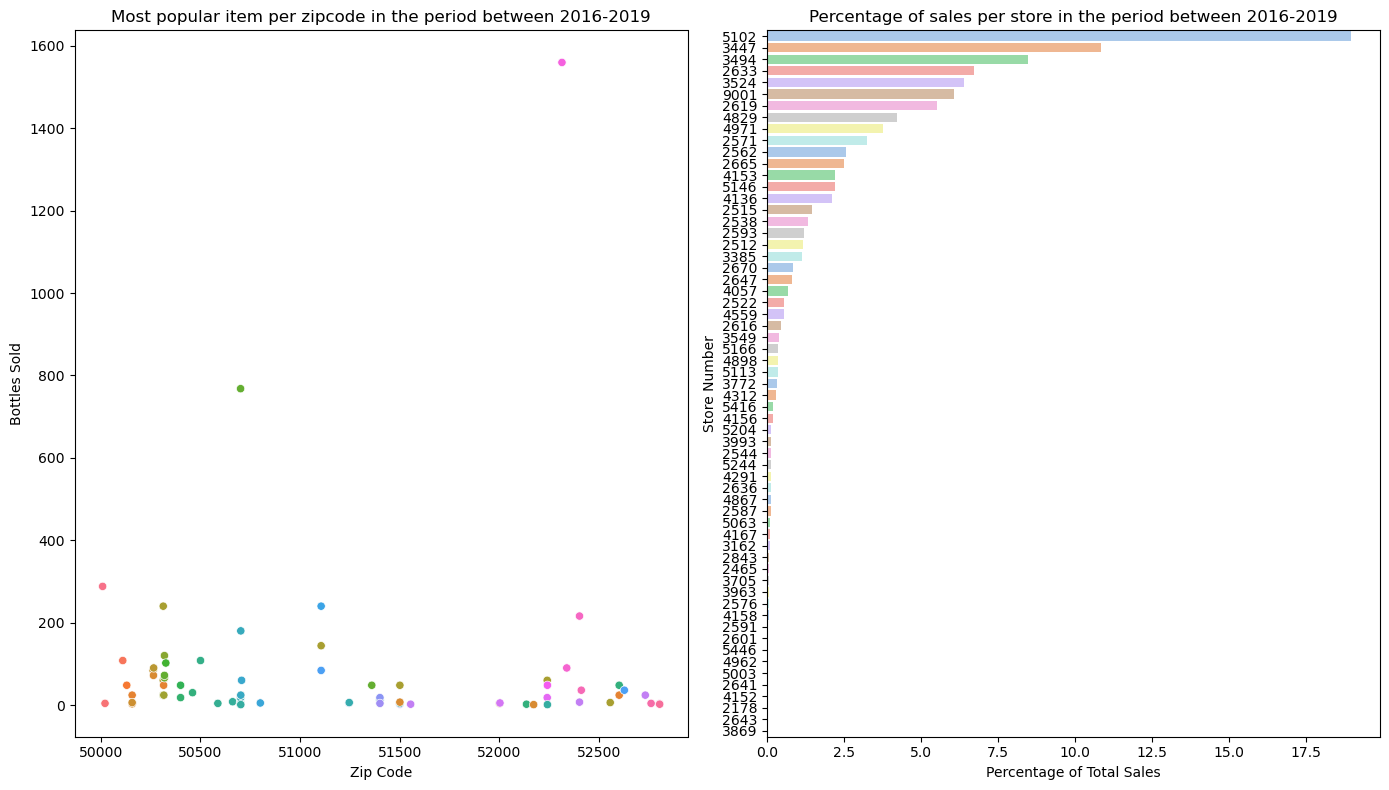

In [4]:
#|export
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

x_1 = most_popular.zip_code

y_1 = most_popular.bottles_sold

x_2 = (sales_per_store
       .sort_values(by='sale_dollars_percentage', ascending=False)
       .sale_dollars_percentage)

y_2 = (sales_per_store
       .sort_values(by='sale_dollars_percentage', ascending=False)
       .store_number)

hue = most_popular.item_description

sns.scatterplot(x=x_1, y=y_1, hue=hue, legend=False, ax=ax1).set(
    xlabel='Zip Code', 
    ylabel='Bottles Sold'
)


sns.barplot(x=x_2, y=y_2, palette="pastel", ax=ax2).set(
    xlabel='Percentage of Total Sales', 
    ylabel='Store Number'
)


ax1.set_title("Most popular item per zipcode in the period between 2016-2019")
ax2.set_title("Percentage of sales per store in the period between 2016-2019")
fig.set_tight_layout(True)
st.pyplot(fig)

In [5]:
from nbdev.export import nb_export
nb_export('app.ipynb', '.')